In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep

env = gym.make('MountainCar-v0')

#### Mountain Car Problem
1. Action Space: motor = (left, neutral, right):int
2. Observation Space: np.array([velocity, position])
    - Veclocity = (-0.07, 0.07)
    - Position = (-1.2, 0.6)

In [2]:
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box(2,)


### Train

In [3]:
class State:
    def __init__(self):
        self.pos = None
        self.vel = None

class Agent:
    def __init__(self, env):
        self.velocityLimit = np.array([env.observation_space.low[1], env.observation_space.high[1]])
        self.positionLimit = np.array([env.observation_space.low[0], env.observation_space.high[0]])
        self.velocityStep, self.positionStep = 0.005, 0.05
        self.velocitySpace = np.arange(self.velocityLimit[0], self.velocityLimit[1] 
                                       + self.velocityStep, self.velocityStep)
        self.positionSpace = np.arange(self.positionLimit[0], self.positionLimit[1] 
                                       + self.positionStep, self.positionStep)
        self.Q = np.full(shape = (len(self.velocitySpace), len(self.positionSpace), 3),
                                       fill_value = 0.0, dtype = np.float32)
#         self.Q = np.random.uniform(-1.0, 0.0, size = (len(self.velocitySpace),
#                                                                     len(self.positionSpace), 3))
        self.Policy = np.full(shape = (len(self.velocitySpace), len(self.positionSpace), 3), 
                              fill_value = 1.0/3.0)
        self.collectiveRecord = []
        self.success = []
        
    def getActionValueIndex(self, state, action):
#         print(self.positionLimit)
        posOffset = state[0] - self.positionLimit[0]
        velOffset = state[1] - self.velocityLimit[0]
        posInd = posOffset // self.positionStep
        velInd = velOffset // self.velocityStep
        
        return np.array([velInd, posInd, action], dtype= np.int)
  
    def getAction(self, state):
        ind = self.getActionValueIndex(state, 0)
        p = self.Policy[ind[0], ind[1], :]
        action = np.random.choice([0, 1, 2], size = 1, p = p)
        return action[0]

In [4]:
env = gym.make('MountainCar-v0')
agent = Agent(env)
env.seed(0)
print(agent.Policy.shape)
#--------------------#
tempRow = np.arange(agent.Policy.shape[0]).tolist()
tempCol = np.arange(agent.Policy.shape[1]).tolist()
indCol = []
indRow = []
for ind in tempRow:
    indCol += tempCol
for ind in tempRow:
    indRow += [ind for _ in tempCol]
#-------------------#

(30, 38, 3)


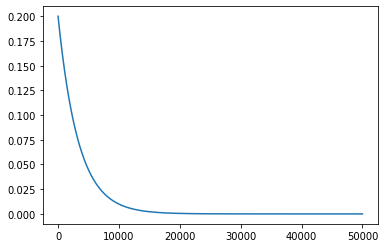

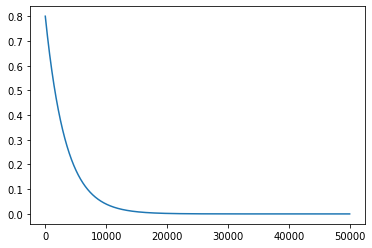

In [5]:
eps = 0.8
alpha = 0.2
epsReduction = 0.01
alphaDecay = 0.9997
t = []
t1 = []
for _ in range(50000):
    t.append(alpha)
    t1.append(eps)
    eps = max(0, eps * alphaDecay)
    alpha = alpha*alphaDecay
plt.plot(t)
plt.show()
plt.plot(t1)
plt.show()

In [6]:
eps = 0.8
alpha = 0.2
epsReduction = 0.01
alphaReduciton = 0.01
alphaDecay = 0.999
epsDecay = 0.995
for i_eps in tqdm(range(1, 5001)):
    state = env.reset()
    gamma = 1.0
    for t in range(201):
#         if i_eps > 0: env.render()
        ind = agent.getActionValueIndex(state, 0)
        if np.random.random() < 1 - eps:
                action = np.argmax(agent.Q[ind[0], ind[1], :]) 
        else:
            action = np.random.randint(0, 3)
                
        nextState, reward, done, info = env.step(action)
        ind = agent.getActionValueIndex(state, action)
        nextInd = agent.getActionValueIndex(nextState, action)

        deltaActionValue = np.subtract(np.add(reward, gamma * np.max(agent.Q[nextInd[0],
                                                nextInd[1], :])), agent.Q[ind[0], ind[1], action])
        agent.Q[ind[0], ind[1], action] = ((1 - 0) * agent.Q[ind[0], ind[1], action] 
                                                         + np.multiply(alpha, deltaActionValue))
        if done: 
            if t < 199:
                agent.success.append((i_eps, t))
#             sleep(1)
            agent.collectiveRecord.append(t)
            eps = max(0, eps * epsDecay)
            alpha = max(0, alpha * alphaDecay)
            break
        state = nextState
env.close()

100%|██████████| 5000/5000 [01:00<00:00, 82.10it/s]


In [7]:
env.close()

In [8]:
# print(agent.Q)

In [9]:
# agent.optimalAction

In [10]:
np.mean(agent.collectiveRecord[-100:])

197.42

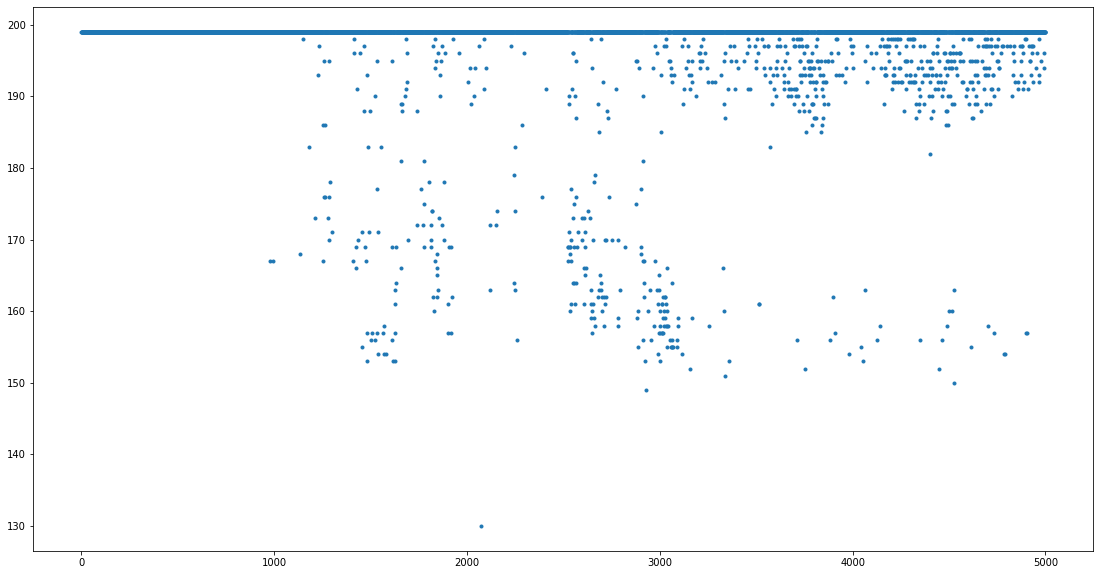

In [11]:
fig, ax = plt.subplots(figsize = (19, 10))
plt.plot(agent.collectiveRecord[:],'.')

In [12]:
for i_eps in (range(1, 400)):
    state = env.reset()
#     env.seed(i_eps)
    gamma = 1.0
    ind = agent.getActionValueIndex(state, 0)
    action = np.argmax(agent.Q[ind[0], ind[1], :]) 
    
    for t in range(201):
        ind = agent.getActionValueIndex(state,  0)
        nextState, reward, done, info = env.step(action)
        nextInd = agent.getActionValueIndex(nextState, 0)
        
        nextAction = np.argmax(agent.Q[nextInd[0], nextInd[1], :])
        
        if done: 
            if t < 199:
#                 alphaDecay = 0.999
#                 epsDecay = 0.999
                agent.success.append((i_eps, t))
#             agent.Q = agent.Q * 1.01
            agent.collectiveRecord.append(t)
            print(t)
            break
        state = nextState
        action = nextAction
env.close()

199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199


In [13]:
np.power(0.95, 10) 

0.5987369392383787

In [14]:
agent.Policy[:, :, :] = eps
agent.Policy[indRow, indCol, optimalAction.flatten().tolist()] = 1 - 2*eps

NameError: name 'optimalAction' is not defined

In [ ]:
agent.success[:]